In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
df_normal = pd.read_csv("/Users/lorenzogonzalez/Downloads/LNLL Data Challenge/src/data/ptbdb_normal.csv", header = None)
df_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_abnormal = pd.read_csv("/Users/lorenzogonzalez/Downloads/LNLL Data Challenge/src/data/ptbdb_abnormal.csv", header = None)
df_abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
df_normal.shape

(4046, 188)

In [5]:
df_abnormal.shape

(10506, 188)

In [6]:
num_col = len(df_normal.columns) - 1
time = np.arange(0, num_col)/125
time = time * 1000
time[-1]

1488.0

In [7]:
df_normal.columns = list(time) + ["label"]
df_abnormal.columns = list(time) + ["label"]

df_normal.head()

,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,...,1424.0,1432.0,1440.0,1448.0,1456.0,1464.0,1472.0,1480.0,1488.0,label
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = pd.concat([df_normal, df_abnormal], axis = 0)
df.head()

,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,...,1424.0,1432.0,1440.0,1448.0,1456.0,1464.0,1472.0,1480.0,1488.0,label
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
classes = {0: "Normal", 1: "Abnormal"}
counts = df["label"].value_counts()
counts.index = counts.index.map(classes)
counts

label
Abnormal    10506
Normal       4046
Name: count, dtype: int64

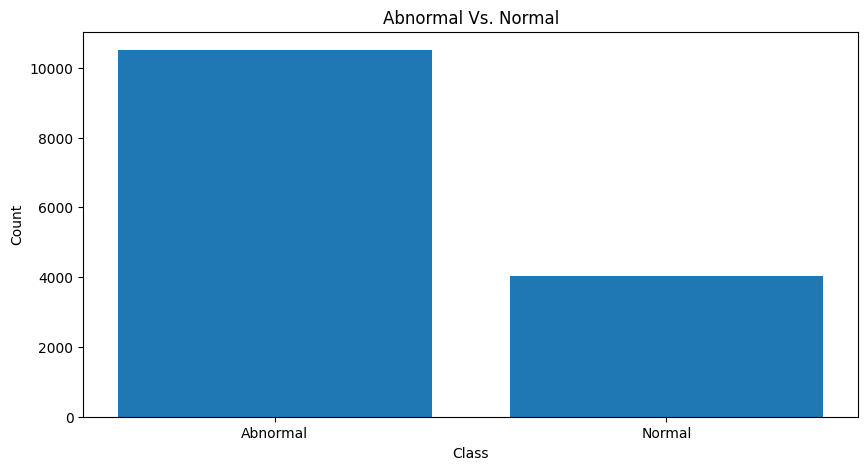

In [10]:
plt.figure(figsize = (10, 5))
plt.bar(counts.index, counts.values)
plt.title("Abnormal Vs. Normal")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)


((11641, 187), (1455, 187), (1456, 187), (1455,), (1456,), (11641,))

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters = 64,kernel_size = 3, activation = "relu", input_shape = (x_train.shape[1],1)),
    tf.keras.layers.MaxPooling1D(pool_size = 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters = 128,kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(pool_size = 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

/Users/lorenzogonzalez/Downloads/LNLL Data Challenge/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss = "binary_crossentropy", metrics = ["accuracy"])

In [35]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_val,y_val))

Epoch 1/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7188 - loss: 0.5779 - val_accuracy: 0.7349 - val_loss: 0.4938
Epoch 2/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7247 - loss: 0.5070 - val_accuracy: 0.7466 - val_loss: 0.4895
Epoch 3/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7548 - loss: 0.4835 - val_accuracy: 0.7878 - val_loss: 0.4374
Epoch 4/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7974 - loss: 0.4163 - val_accuracy: 0.8235 - val_loss: 0.3669
Epoch 5/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8299 - loss: 0.3558 - val_accuracy: 0.8729 - val_loss: 0.2625
Epoch 6/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8719 - loss: 0.2966 - val_accuracy: 0.9045 - val_loss: 0.2292
Epoch 7/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9023 - loss: 0.2444 - val_accuracy: 0.8860 - val_loss: 0.2887
Epoch 8/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8993 - loss: 0